In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('Data/Data.csv')
data

,T ярк. K,T терм. K,I. mA,U. B,W. мВт
0,1173,1242,0.70,22.86,16.00
1,1273,1348,0.76,27.85,21.25
2,1373,1454,0.80,30.94,24.75
3,1423,1507,0.83,33.80,27.92
4,1473,1560,0.87,36.85,32.06
5,1573,1666,1.02,50.07,51.07
6,1673,1771,1.07,55.70,59.71
7,1723,1824,1.13,61.35,69.33
8,1773,1877,1.19,67.10,79.65
9,1823,1930,1.27,76.00,96.52


In [8]:
T = np.array(data['T терм. K'])
W = np.array(data['W. мВт'])

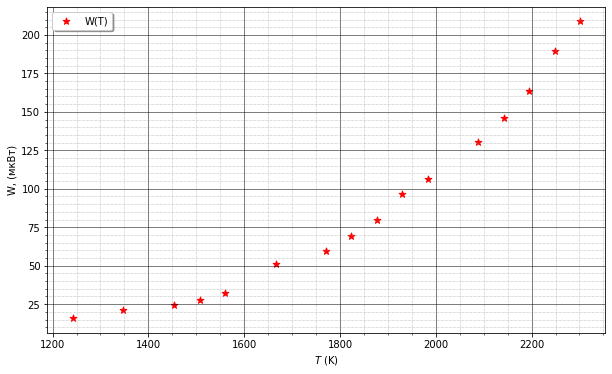

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(Tcut, approx(Tcut, *beta_opt1), 'coral', lw = 2)
ax.scatter(T, W, marker = '*', color = 'red', s = 50)
lgnd = ax.legend([r'W(T)'], loc='best', shadow=True)

ax.set_ylabel(r'W, (мкВт)')
ax.set_xlabel(r'$T$ (K)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)

# plt.xlim (-0.1, 5.5)
# plt.ylim (-0.5, 3)
plt.savefig('W(T).png', dpi=400, quality=100)
plt.show()

a =  7.030245413415466e-12
sigma_a =  1.1080894350797243e-13
S_e =  6.565990965867165
Relative S_r a = %  1.5761746139974184


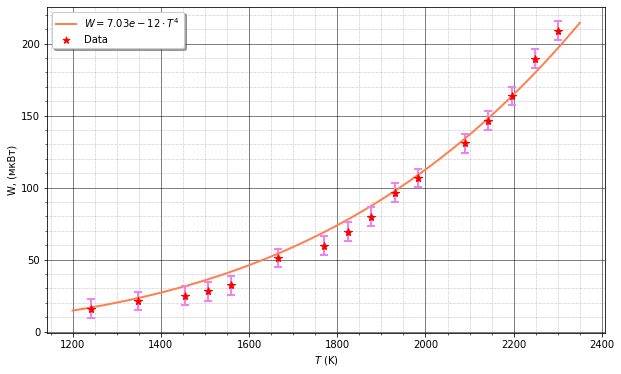

In [68]:
def approx(x, a):
    return a * x**4 
beta_opt1, beta_cov1 = curve_fit(approx,T,W)
a = beta_opt1[0]



print('a = ', a)




#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])



print('sigma_a = ', sigma_a)



residuals1 = W - approx(T,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(T))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))




# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(1200, 2350, 0.1)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
ax.scatter(T, W, marker = '*', color = 'red', s = 50)
lgnd = ax.legend([r'$W = {:.2e} \cdot T^4 $ '.format(a), 'Data'], loc='best', shadow=True)

# ax.set_title(r'График Ферми')
ax.set_ylabel(r'W, (мкВт)')
ax.set_xlabel(r'$T$ (K)')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(T, W, fmt = 'ro', marker = '*', markersize = '8', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('W(t)fit2.png', dpi=400, quality=100)
plt.show()

a =  4.351217041307874
b =  -28.39036892580831
sigma_a =  0.10969287005175189
sigma_b =  0.8219256336689884
S_e =  0.07557191548372602
Relative S_r a = %  2.5209698576373656
Relative S_r b = %  2.895086132261619


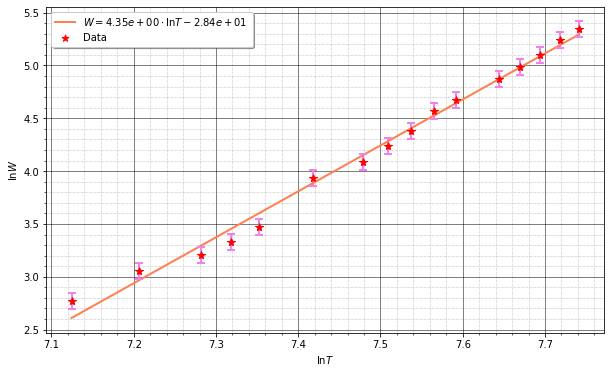

In [29]:
def approx(x, a, b):
    return a * x +b
beta_opt1, beta_cov1 = curve_fit(approx,np.log(T),np.log(W))
a = beta_opt1[0]
b = beta_opt1[1]


print('a = ', a)
print('b = ', b)



#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = np.log(W) - approx(np.log(T),*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(np.log(T)))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))



# график
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.log(T), approx(np.log(T), *beta_opt1), 'coral', lw = 2)
ax.scatter(np.log(T), np.log(W), marker = '*', color = 'red', s = 50)
lgnd = ax.legend([r'$W = {:.2e} \cdot \ln T {:.2e}$ '.format(a,b), 'Data'], loc='best', shadow=True)


ax.set_ylabel(r'$\ln W$')
ax.set_xlabel(r'$\ln T$ ')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(np.log(T), np.log(W), fmt = 'ro', marker = '*', markersize = '8', yerr = S_e, capsize = 4, elinewidth = 2, capthick = 2, ecolor = 'violet')


# plt.xlim (-10, 850)
# plt.ylim (-10, 245)
plt.savefig('lnW.png', dpi=400, quality=100)
plt.show()

In [66]:

eps = 0.0001*T[6:]-0.01688
s = 0.36
c = 3*10**8
kb = 1.38 * 10**(-23)
hreal = 6.626 * 10**(-34)

In [47]:
sigma = W[6:]*10/(eps * s * T[6:]**4)
sigma

array([1.05233399e-09, 1.05116014e-09, 1.04348803e-09, 1.09717752e-09,
       1.05584675e-09, 9.92901321e-10, 9.78146236e-10, 9.65948988e-10,
       9.90508890e-10, 9.70129184e-10])

In [48]:
np.mean(sigma)

1.019764105427198e-09

In [52]:
stats.sem(sigma)

1.4365600564544544e-11

In [64]:
stats.sem(sigma)/np.mean(sigma) * 100

1.4087180052808908

In [57]:
h = (2*np.pi**5 * kb**4/(15*c**2 * sigma))**(1/3)
h

array([2.49997757e-33, 2.50090781e-33, 2.50702206e-33, 2.46544326e-33,
       2.49720205e-33, 2.54889502e-33, 2.56164759e-33, 2.57238468e-33,
       2.55094553e-33, 2.56868464e-33])

In [59]:
np.mean(h)

2.5273110221853114e-33

In [60]:
stats.sem(h)

1.1802508877127783e-35

In [65]:
stats.sem(h)/np.mean(h) * 100

0.4669986706631148

In [67]:
np.mean(h)/hreal

3.8142333567541677